In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [21]:
df=pd.read_csv('/home/samyak/ML_PROJECT/ML_Project/notebook/data/StudentsPerformance.csv')

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.shape

(1000, 8)

In [24]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_features)
print(len(num_features))

['math score', 'reading score', 'writing score']
3


In [30]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_features)
print(len(cat_features))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
5


In [31]:
df['Total']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [41]:
reading_full=df[df['reading score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()
print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [ ]:
#From above values we get students have performed in reading

In [40]:
reading_less_20=df[df['reading score']<=20]['Average'].count()
writing_less_20=df[df['writing score']<=20]['Average'].count()
math_less_20=df[df['math score']<=20]['Average'].count()
print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


In [39]:
#From above values we get students have performed worst in Maths
#Best performance in reading section

In [ ]:
#EDA

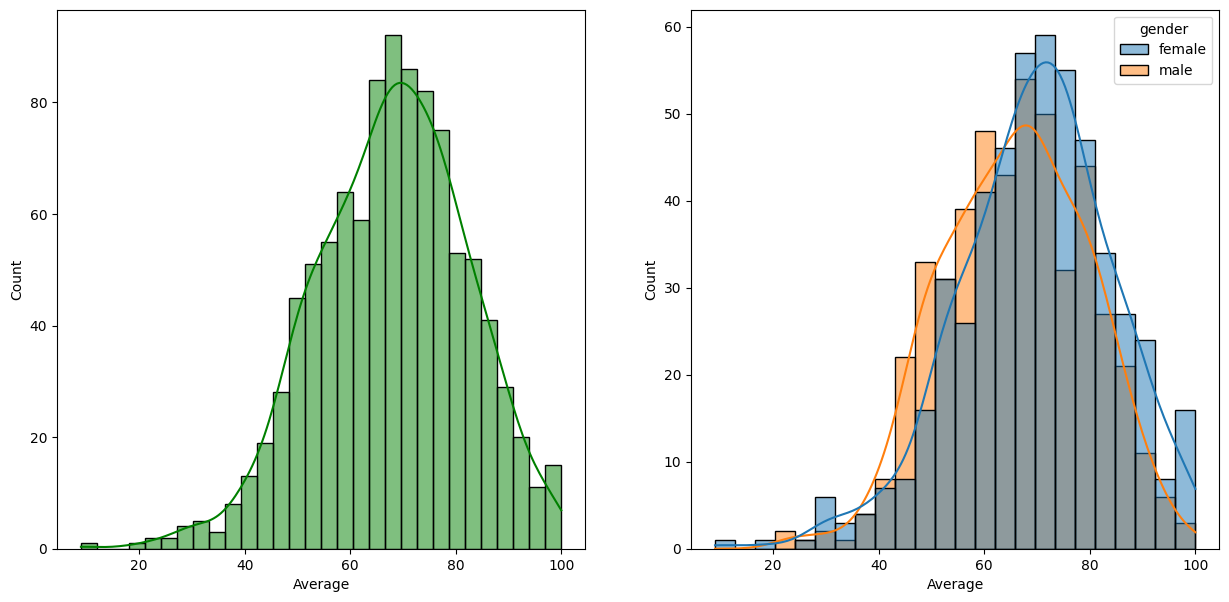

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Create two subplots

# First subplot (Histogram with bins)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axs[0])

# Second subplot (Histogram with KDE and hue)
sns.histplot(data=df, x='Average', kde=True, hue='gender', ax=axs[1])

plt.show()


In [44]:
#Females tend to get more marks than male

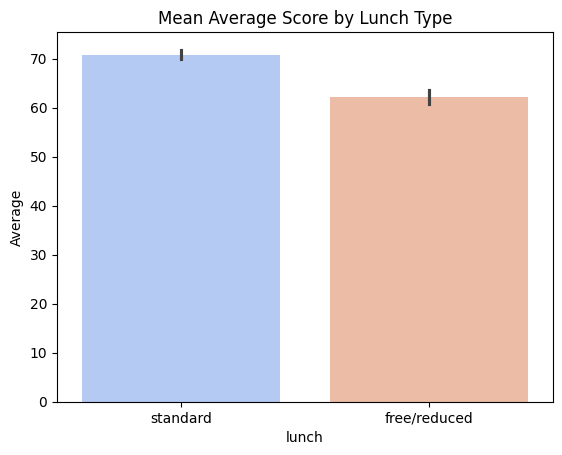

In [47]:
sns.barplot(data=df, x='lunch', y='Average', estimator=np.mean, palette='coolwarm')
plt.title("Mean Average Score by Lunch Type")
plt.show()


In [ ]:
#This shows that having a standard lunch get you better scores

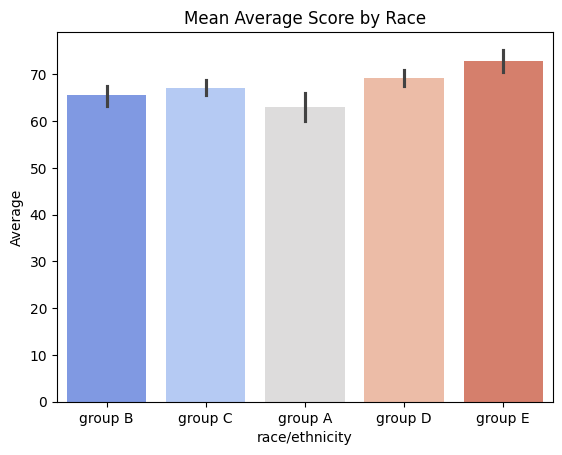

In [54]:
sns.barplot(data=df, x='race/ethnicity', y='Average', estimator=np.mean, palette='coolwarm')
plt.title("Mean Average Score by Race")
plt.show()

In [55]:
#This shows that students belonging to Group E perform better 

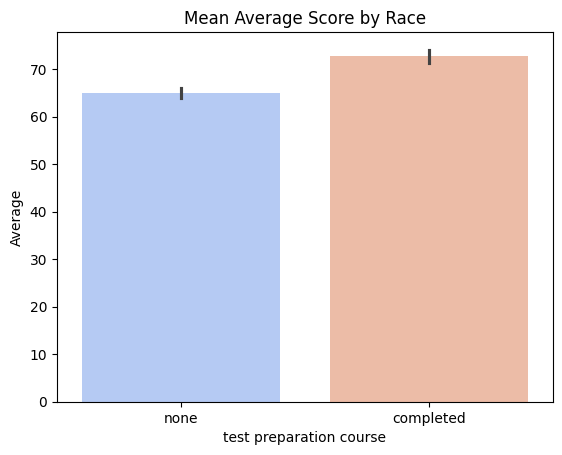

In [ ]:
sns.barplot(data=df, x='test preparation course', y='Average', estimator=np.mean, palette='coolwarm')
plt.title("Mean Average Score by test preparation course")
plt.show()

In [58]:
#This shows that the students who ave completed the course perform better